<a href="https://colab.research.google.com/github/Law101/Spot_Mask_Challenge/blob/master/Spot_Mask_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O images.zip --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6" && rm -rf /tmp/cookies.txt

--2020-06-20 21:17:26--  https://docs.google.com/uc?export=download&confirm=wbk6&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6
Resolving docs.google.com (docs.google.com)... 173.194.79.113, 173.194.79.101, 173.194.79.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/7ht3hdinded1n4vdev8o5q7bn64f1dlb/nudgljd9l0a6nuttoa8e1jkseqikq1ut/1592687775000/12463928819926971683/03228904737079369274Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download [following]
--2020-06-20 21:17:26--  https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/7ht3hdinded1n4vdev8o5q7bn64f1dlb/nudgljd9l0a6nuttoa8e1jkseqikq1ut/1592687775000/12463928819926971683/03228904737079369274Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download
Resolving doc-0c-5g-docs.googleusercontent.com (doc-0c-5g-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connectin

In [ ]:
!wget -O train.csv --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F" && rm -rf /tmp/cookies.txt

--2020-06-20 21:17:32--  https://docs.google.com/uc?export=download&confirm=&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F
Resolving docs.google.com (docs.google.com)... 173.194.79.113, 173.194.79.138, 173.194.79.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5s-docs.googleusercontent.com/docs/securesc/nn284p96dvirhtpnvsbhf9hgfahk5fld/7vfjd4ufov1ed3k39dferdtf62tmsnjs/1592687850000/12463928819926971683/08515007462868309169Z/1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F?e=download [following]
--2020-06-20 21:17:32--  https://doc-10-5s-docs.googleusercontent.com/docs/securesc/nn284p96dvirhtpnvsbhf9hgfahk5fld/7vfjd4ufov1ed3k39dferdtf62tmsnjs/1592687850000/12463928819926971683/08515007462868309169Z/1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F?e=download
Resolving doc-10-5s-docs.googleusercontent.com (doc-10-5s-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to

In [ ]:
!unzip '/content/images.zip'

Archive:  /content/images.zip
   creating: images/
  inflating: images/wiovvusmzmxindaealykgesxwwleql.jpg  
  inflating: images/uxykipqshvpliunxlldynrpskpdzeu.png  
  inflating: images/kpcznzbgvgwliaqhkcrwsusssykqvs.jpg  
  inflating: images/nlhevzkzseaudpnhbawmmufkxnqyni.jpg  
  inflating: images/xssuquzxphcmdrpcrurcedzxwazbmm.jpg  
  inflating: images/stjfpwlmjugoohoeqvaoebagvubysc.jpg  
  inflating: images/louklilbbrpqodurfzvvejxglgocwi.jpg  
  inflating: images/bpwzubqeojttiklnrskmqheackknsn.jpg  
  inflating: images/laaqrylcpzmanpcdilwteiuhetchzt.jpg  
  inflating: images/ljkyoarjjsfzpguocnnmteqqidnztx.jpg  
  inflating: images/itxiomwebnkfodztausaduxyrhgfrv.jpg  
  inflating: images/xqjultlkywteeyuuxvtcfmrwqatbkd.jpg  
  inflating: images/wpyvgvjhybaljtzduconhborbnpcps.jpg  
  inflating: images/rblxyebdxsswuozyyjmdcyuyqjmzcz.jpg  
  inflating: images/sczhdwamqbmpolozkmncxyqtcwcbdd.jpg  
  inflating: images/uzewooxjwzphkroseskteuzyuzjgrr.jpg  
  inflating: images/lxrfdtvdhoqgjapvz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import transforms, utils
from torch.utils.data.sampler import SubsetRandomSampler

import os
import time
import PIL
import random

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
seed = 42
random_seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#for GPU
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.enabled = False
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_images_list = train_df['image'].tolist()

images_list = os.listdir('/content/images')
test_images_list = [image for image in images_list if image not in train_images_list]

In [ ]:
image_transform = transforms.Compose([transforms.Resize(size=256),
                                      transforms.CenterCrop(size=224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])

In [ ]:
#Creating the Test Image DataFrame
sub = pd.DataFrame({'image':test_images_list, 'target':0})

In [ ]:
#Transform both train and validation images
train_img = []
for i in range(0, train_df.shape[0]):
  image_path = "/content/images/"+str(train_df.iloc[i,:].image)
  image = PIL.Image.open(image_path).convert('RGB')
  image = image_transform(image)
  train_img.append((image, train_df.iloc[i,:].target))

In [ ]:
resnet50 = torchvision.models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
for parameter in resnet50.parameters():
  parameter.requires_grad = True

In [ ]:
# fc_inputs = 2048
fc_inputs = resnet50.fc.in_features

resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 128),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(128,2),
    nn.LogSoftmax(dim=1)
)

In [ ]:
model = resnet50.to(device)

In [ ]:
loss_function = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000099)

In [ ]:
#Creating Train and Validation data

batch_size = 32
Validation_split = 0.3
shuffle_dataset = True
random_seed = 42
dataset_size = len(train_img)
indices = list(range(dataset_size))
split = int(np.floor(Validation_split * dataset_size))

if shuffle_dataset:
  np.random.seed(random_seed)
  np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(train_img, batch_size=batch_size, sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(train_img, batch_size=batch_size, sampler=valid_sampler)

In [ ]:
epochs = 5

for epoch in range(epochs):
  epoch_start = time.time()
  print("Epoch: {}/{}".format(epoch+1, epochs))

  # Set to training Mode
  model.train()

  # Track Loss and Accuracy within the Epoch
  train_loss = 0.0
  train_acc = 0.0

  valid_loss = 0.0
  valid_acc = 0.0

  for i, (inputs, labels) in enumerate(train_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Clean Existing Gradients
    optimizer.zero_grad()

    #Forward Pass
    outputs = model(inputs)
    
    # Compute Loss
    loss = loss_function(outputs, labels)

    # Backpropagate the gradient
    loss.backward()

    # Update the Parameters
    optimizer.step()

    # Compute the total loss for the batch and add it to train loss
    train_loss += loss.item() * inputs.size(0)

    # Compute the accuracy
    ret, predictions = torch.max(outputs.data, 1)
    correct_counts = predictions.eq(labels.data.view_as(predictions))

    # Convert correct_counts to float and then compute the mean
    acc = torch.mean(correct_counts.type(torch.FloatTensor))

    # Compute total accuracy in the whole batch and add to train_acc
    train_acc += acc.item() * inputs.size(0)

    print("Batch Number: {:03d}, Training: Loss:{:8f}, Accuracy: {:.8f}".format(i, loss.item(), acc.item()))

Epoch: 1/5
Batch Number: 000, Training: Loss:0.215771, Accuracy: 0.96875000
Batch Number: 001, Training: Loss:0.031019, Accuracy: 1.00000000
Batch Number: 002, Training: Loss:0.043799, Accuracy: 1.00000000
Batch Number: 003, Training: Loss:0.161710, Accuracy: 0.93750000
Batch Number: 004, Training: Loss:0.027552, Accuracy: 0.98437500
Batch Number: 005, Training: Loss:0.025728, Accuracy: 1.00000000
Batch Number: 006, Training: Loss:0.023886, Accuracy: 1.00000000
Batch Number: 007, Training: Loss:0.019840, Accuracy: 1.00000000
Batch Number: 008, Training: Loss:0.047365, Accuracy: 0.98437500
Batch Number: 009, Training: Loss:0.027793, Accuracy: 1.00000000
Batch Number: 010, Training: Loss:0.065810, Accuracy: 0.96875000
Batch Number: 011, Training: Loss:0.085769, Accuracy: 0.95312500
Batch Number: 012, Training: Loss:0.009118, Accuracy: 1.00000000
Batch Number: 013, Training: Loss:0.016055, Accuracy: 1.00000000
Batch Number: 014, Training: Loss:0.004397, Accuracy: 1.00000000
Epoch: 2/5
Bat

In [ ]:
torch.save(model.state_dict(), 'model.pt')
model.load_state_dict(torch.load('/content/model.pt'))
model_weight = model.eval()

In [ ]:
# Validation

history = []
with torch.no_grad():
   # Set to Evaluation Mode
   model_weight.eval()

   #Validation Loop
   for j, (inputs, labels) in enumerate(validation_loader):
     inputs = inputs.to(device)
     labels = labels.to(device)

     # forward pass
     outputs = model_weight(inputs)

     # Compute Loss
     loss = loss_function(outputs, labels)

     # Compute the total Loss for the batch and add it to valid_loss
     valid_loss += loss.item() * inputs.size(0)

     # Calculate Validation Accuracy
     ret, predictions = torch.max(outputs.data, 1)
     correct_counts = predictions.eq(labels.data.view_as(predictions))

     # Convert Correct_counts to float and then compute the mean
     acc = torch.mean(correct_counts.type(torch.FloatTensor))

     # Compute total accuracy in the whole batch and add to valid_acc
     valid_acc += acc.item() * inputs.size(0)

     print("Validation Batch Number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

      # Find average training loss and training accuracy
     avg_train_loss = train_loss/len(train_indices)
     avg_train_acc = train_acc/float(len(train_indices))
     
     # Find Average training loss and training Accuracy
     avg_valid_loss = valid_loss/len(val_indices)
     avg_valid_acc = valid_acc/float(len(val_indices))

     history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
     epoch_end = time.time()

     print("Epoch : {:03d}, Training: Loss: {:.8f}, Accuracy: {:.8f}%,\n\t\t Validation : Loss : {:.8f}, Accuracy: {:.8f}%, Time: {:.8f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

Validation Batch Number: 000, Validation: Loss: 0.0571, Accuracy: 0.9688
Epoch : 004, Training: Loss: 0.00110450, Accuracy: 100.00000000%,
		 Validation : Loss : 0.00932173, Accuracy: 15.81632653%, Time: 26.31363916s
Validation Batch Number: 001, Validation: Loss: 0.0646, Accuracy: 0.9531
Epoch : 004, Training: Loss: 0.00110450, Accuracy: 100.00000000%,
		 Validation : Loss : 0.01987672, Accuracy: 31.37755102%, Time: 26.76736188s
Validation Batch Number: 002, Validation: Loss: 0.1357, Accuracy: 0.9531
Epoch : 004, Training: Loss: 0.00110450, Accuracy: 100.00000000%,
		 Validation : Loss : 0.04203311, Accuracy: 46.93877551%, Time: 27.22129297s
Validation Batch Number: 003, Validation: Loss: 0.0172, Accuracy: 0.9844
Epoch : 004, Training: Loss: 0.00110450, Accuracy: 100.00000000%,
		 Validation : Loss : 0.04483835, Accuracy: 63.01020408%, Time: 27.67517900s
Validation Batch Number: 004, Validation: Loss: 0.1379, Accuracy: 0.9531
Epoch : 004, Training: Loss: 0.00110450, Accuracy: 100.0000

In [ ]:
# Test

test_img = []
for img in sub['image']:
  img_path = "/content/images/"+str(img)
  test_image = PIL.Image.open(img_path).convert('RGB')

  test_image_tensor = image_transform(test_image)
  if torch.cuda.is_available():
    test_image_tensor = test_image_tensor.view(1,3,224,224).cuda()
  else:
    test_image_tensor = test_image_tensor.view(1,3,224,224)

  with torch.no_grad():
    model_weight.eval()
    out = model_weight(test_image_tensor)
    ps = torch.exp(out)
    topk, topclass = ps.topk(1, dim=1,)
    sub.loc[sub['image']==img, 'target'] = float(ps[0][1])

In [ ]:
sub.head

<bound method NDFrame.head of                                   image    target
0    ejwoiledjlwunsjpnuquukzkjhalov.jpg  0.012972
1    plvzvjasjncvrchqwqdwhuzotiofek.png  0.939778
2    tkudaszaqtrzmyypabwhwanaqqdgsn.jpg  0.974407
3    dveocsyrdwmmokqvzmherympxsnhjg.jpg  0.976098
4    wqzkxqasodsnxcugavcqsuqmdwqfoa.png  0.967266
..                                  ...       ...
504  wcnsyehazqxgakcdbtyehtkwoiwppj.jpg  0.776949
505  nmorsdnxcjanqzfyfjrxbvumnyihft.jpg  0.900710
506  mtkmqoxjnmplockjwdilejfsrxcbvy.jpg  0.007538
507  unkvelhemzsndcplwwcplvzhztcllz.jpg  0.865362
508  clibkrbidguqcugbkymxqioqwolsvv.jpg  0.971706

[509 rows x 2 columns]>

In [ ]:
sub.to_csv('Sub5.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


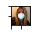

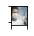

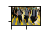

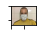

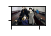

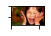

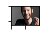

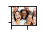

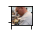

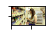

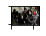

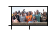

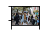

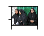

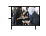

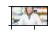

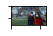

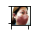

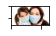

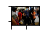

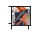

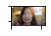

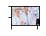

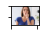

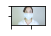

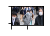

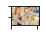

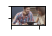

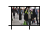

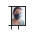

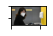

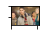

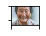

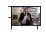

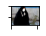

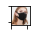

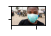

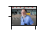

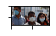

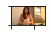

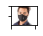

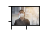

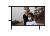

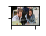

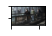

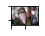

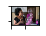

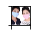

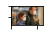

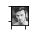

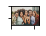

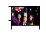

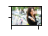

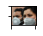

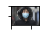

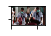

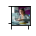

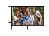

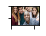

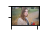

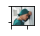

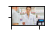

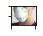

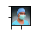

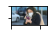

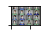

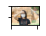

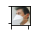

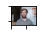

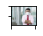

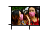

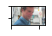

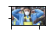

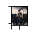

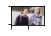

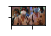

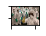

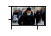

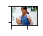

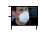

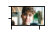

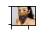

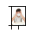

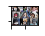

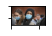

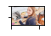

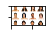

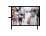

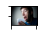

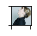

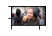

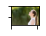

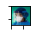

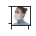

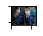

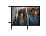

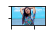

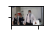

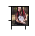

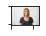

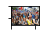

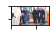

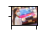

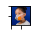

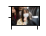

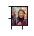

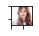

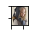

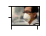

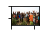

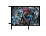

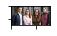

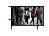

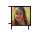

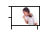

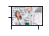

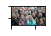

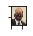

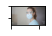

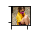

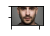

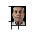

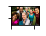

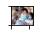

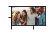

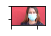

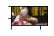

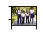

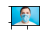

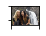

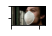

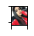

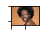

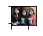

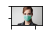

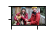

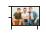

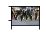

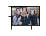

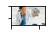

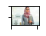

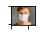

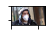

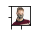

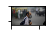

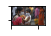

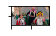

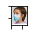

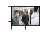

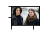

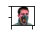

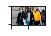

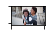

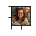

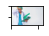

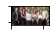

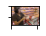

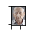

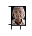

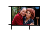

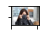

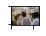

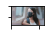

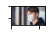

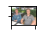

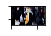

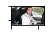

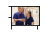

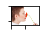

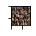

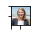

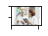

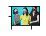

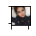

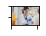

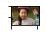

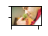

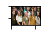

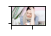

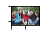

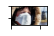

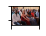

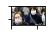

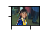

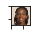

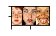

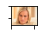

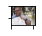

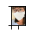

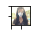

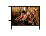

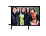

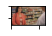

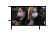

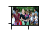

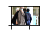

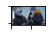

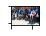

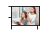

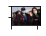

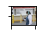

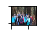

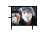

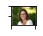

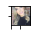

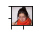

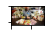

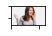

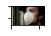

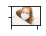

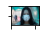

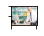

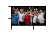

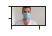

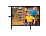

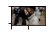

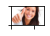

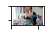

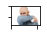

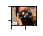

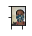

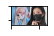

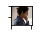

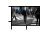

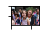

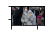

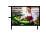

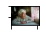

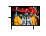

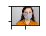

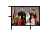

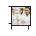

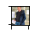

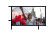

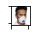

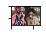

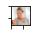

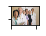

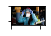

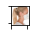

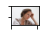

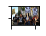

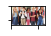

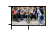

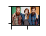

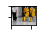

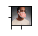

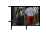

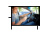

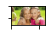

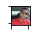

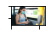

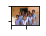

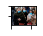

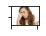

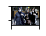

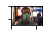

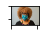

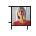

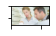

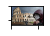

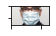

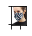

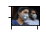

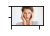

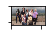

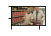

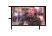

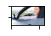

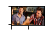

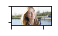

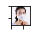

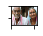

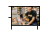

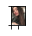

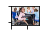

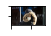

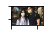

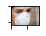

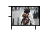

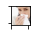

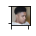

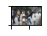

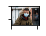

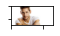

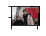

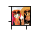

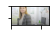

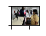

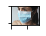

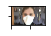

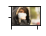

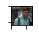

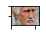

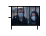

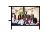

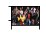

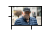

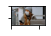

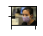

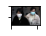

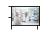

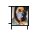

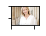

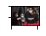

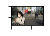

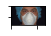

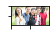

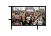

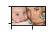

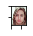

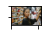

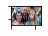

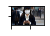

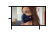

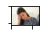

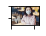

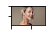

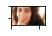

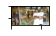

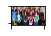

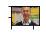

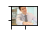

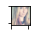

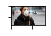

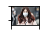

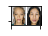

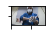

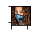

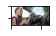

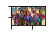

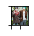

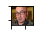

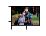

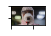

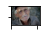

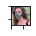

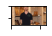

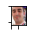

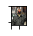

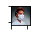

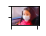

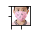

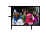

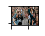

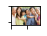

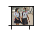

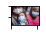

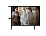

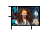

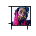

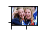

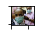

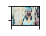

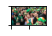

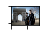

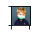

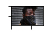

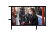

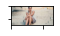

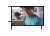

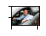

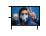

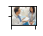

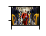

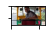

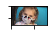

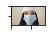

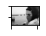

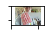

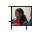

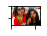

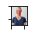

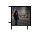

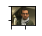

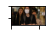

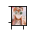

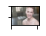

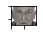

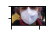

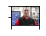

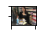

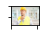

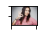

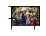

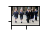

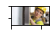

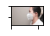

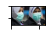

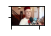

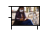

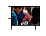

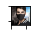

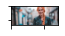

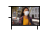

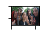

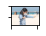

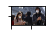

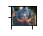

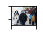

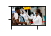

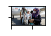

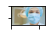

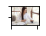

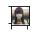

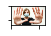

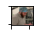

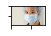

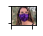

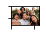

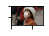

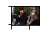

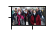

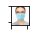

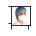

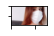

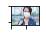

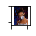

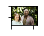

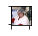

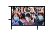

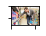

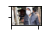

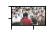

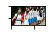

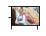

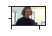

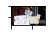

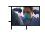

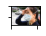

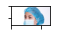

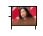

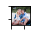

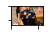

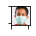

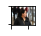

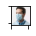

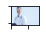

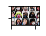

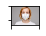

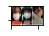

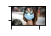

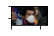

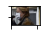

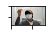

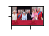

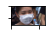

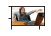

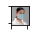

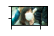

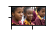

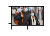

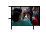

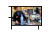

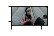

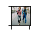

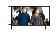

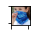

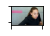

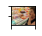

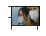

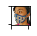

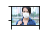

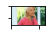

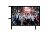

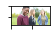

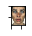

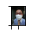

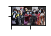

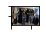

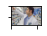

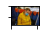

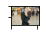

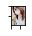

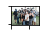

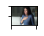

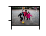

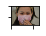

<Figure size 10800x10800 with 0 Axes>

In [ ]:
show=sub
nrow = show.shape[0]
ncol = 1

fig = plt.figure(figsize=(4, 10)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 


for num, x in enumerate(show.image):
        img_path="/content/images/"+str(x)
        im= PIL.Image.open(img_path).convert('RGB')
        ax= plt.subplot(gs[num,0])
        fig = plt.figure()
        fig.set_size_inches(150,150)
        ax.imshow(im)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

plt.show()